# Starter Code & EDA, Roberta Sentence Embeddings with Bayesian Model

### Hello all! In this notebook we're going to examine the data we're given, gonna do some exploratory data analysis and visualizations, aiming to get some insights and find some patterns about the data.

### In second part we're going to implement some simple baseline model to make a starting point for the competition.

### Well that's enough of me talking, let's get started:

# Loading Libraries

### Here we load some packages which we're going to need them in future cells. 

In [1]:
# adding wordcloud in offline mode

import sys
sys.path.append('../input/wcloud/word_cloud-master')
sys.path.append('../input/sentence-transformers/sentence-transformers-master')
import wordcloud

In [2]:
# loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

# setting some globl config

plt.style.use('ggplot')
orange_black = [
    '#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820'
]
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams["figure.facecolor"] = '#FFFACD'
plt.rcParams["axes.facecolor"] = '#FFFFE0'
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = orange_black[3]
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["grid.linestyle"] = '--'



import warnings
warnings.filterwarnings("ignore")

# Loading Data

### We load our train and test data. We do have small dataset with few amount of features. Most important one seems to be excerpt which is the feature that covers most of the useful data. Since this is "Code Competition" our test set seems to be small but it's going to load actual test set when we commit the notebook.

In [3]:
# loding train and test data

train_df = pd.read_csv('../input/commonlitreadabilityprize/train.csv')
test_df = pd.read_csv('../input/commonlitreadabilityprize/test.csv')

In [4]:
# checking dataframes and their shape

print('\033[1m'+'TRAIN COLUMNS:')
display(train_df.columns)
print('\033[1m''\033[1m''TEST COLUMNS:')
display(test_df.columns)
print('\033[1m'+'TRAIN SHAPE:')
display(train_df.shape)
print('\033[1m'+'TEST SHAPE:')
display(test_df.shape)

TRAIN COLUMNS:


Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

TEST COLUMNS:


Index(['id', 'url_legal', 'license', 'excerpt'], dtype='object')

TRAIN SHAPE:


(2834, 6)

TEST SHAPE:


(7, 4)

# Target Distribution

### Let's start with what kind of a problem we have given and what metrics we can use. As you can see below we have continous target labels so we have "Regression" problem. When we check the distribution of targets we do see kinda normal distribution, which is good.

In [5]:
def plot_dist3(df, feature, title):
    
    # Creating a customized chart. and giving in figsize and everything.
    
    fig = plt.figure(constrained_layout=True)
    
    # creating a grid of 3 cols and 3 rows.
    
    grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

    # Customizing the histogram grid.
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    # Set the title.
    
    ax1.set_title('Histogram')
    
    # plot the histogram.
    
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                  hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 ax=ax1,
                 color=orange_black[1])
    
    ax1.axvline(df.loc[:, feature].mean(), color='Green', linestyle='dashed', linewidth=3)

    min_ylim, max_ylim = plt.ylim()
    ax1.text(df.loc[:, feature].mean()*1.95, max_ylim*0.95, 'Mean: {:.2f}'.format(df.loc[:, feature].mean()), color='Green', fontsize='12',
             bbox=dict(boxstyle='round',facecolor='red', alpha=0.5))
    ax1.legend(labels=['Actual','Normal'])
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=24))

    # customizing the QQ_plot.
    
    ax2 = fig.add_subplot(grid[1, :2])
    
    # Set the title.
    
    ax2.set_title('Probability Plot')
    
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=24))

    # Customizing the Box Plot:
    
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    
    ax3.set_title('Box Plot')
    
    # Plotting the box plot.
    
    sns.boxplot(y=feature, data=df, ax=ax3, color=orange_black[2])
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{title}', fontsize=24)

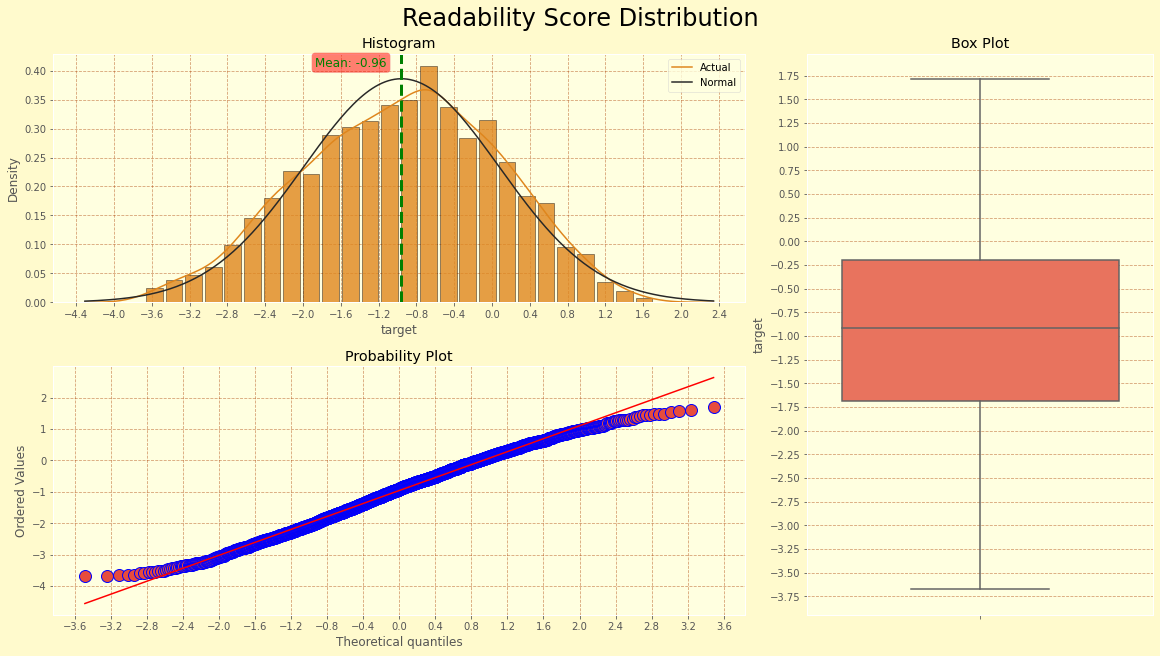

In [6]:
plot_dist3(train_df, 'target', 'Readability Score Distribution')

In [7]:
# checking df again
train_df

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128


# Missing Values

### We have many missing values for url's and licences features therefore they're useless for now and I think dropping them would be good choice.

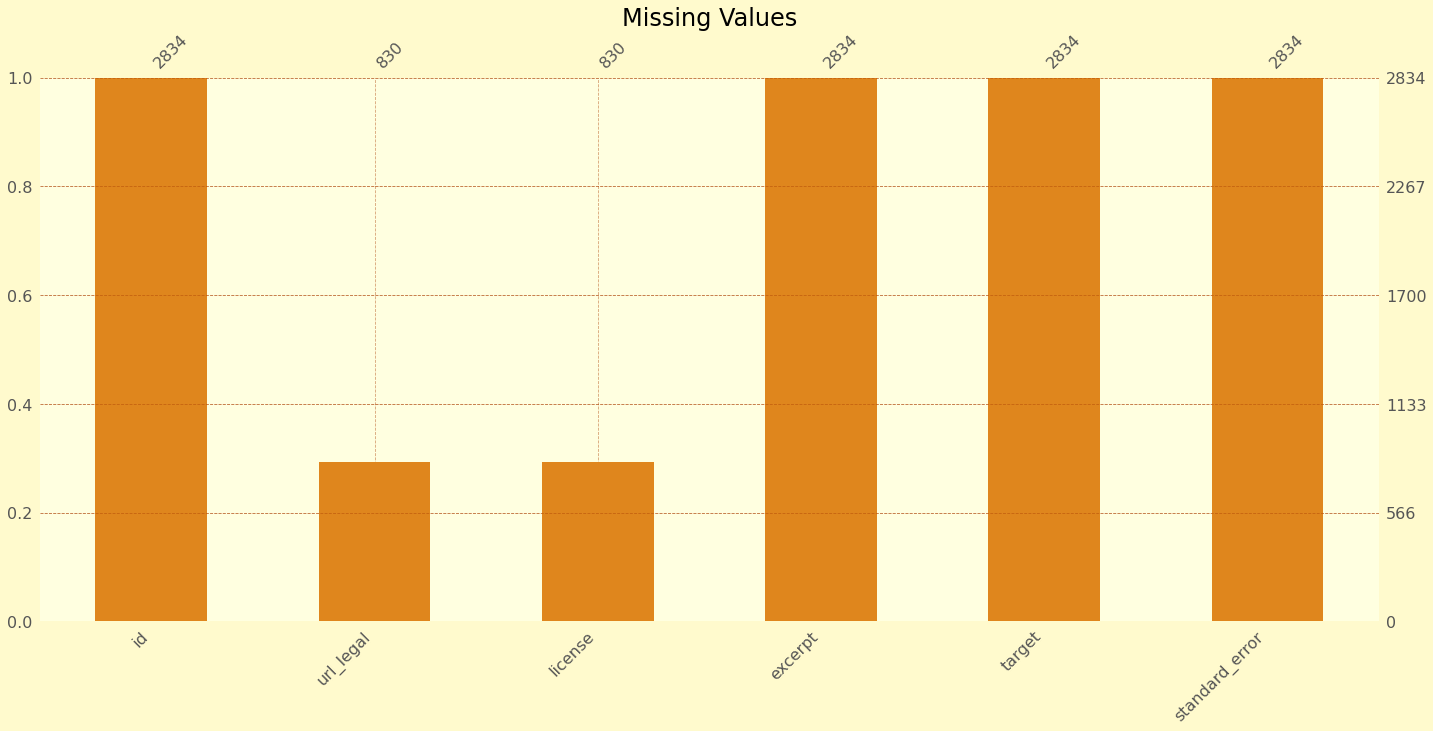

In [8]:
# loading missingno package and plotting nan values

import missingno as msno

msno.bar(train_df, color=(orange_black[1]))

plt.title('Missing Values', fontsize=24)


plt.show()

In [9]:
# dropping some columns

train_df=train_df[['id','excerpt','target','standard_error']]

# Meta Features

### These simple features extracted directly from strings themselves. We can't be sure if they mean anything at all unless we examine them so let's take a look:

## Character Counts

### For the distribution part we have nicely spread data points. With the median character count around 970...

In [10]:
# Creating a new feature for the visualization.

train_df['Character Count'] = train_df['excerpt'].apply(lambda x: len(str(x)))
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

def plot_dist4(df, feature, title, color):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.histplot(df.loc[:, feature],
                 ax=ax1,
                 color=color)
    ax1.set_ylim([0, 275])
    ax1.axvline(df.loc[:, feature].mean(), color=orange_black[1], linestyle='dashed', linewidth=3)

    min_ylim, max_ylim = plt.ylim()
    ax1.text(df.loc[:, feature].mean()*0.9, max_ylim*0.9, 'Mean: {:.2f}'.format(df.loc[:, feature].mean()), color='Green', fontsize='12',
             bbox=dict(boxstyle='round',facecolor=orange_black[1]))
    
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=24))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.histplot(df.loc[:, feature],
                 ax=ax2,
                 cumulative=True,
                 color=orange_black[4])
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(y=feature, data=df, orient='v', ax=ax3, color=orange_black[1])
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.suptitle(f'{title}', fontsize=24)

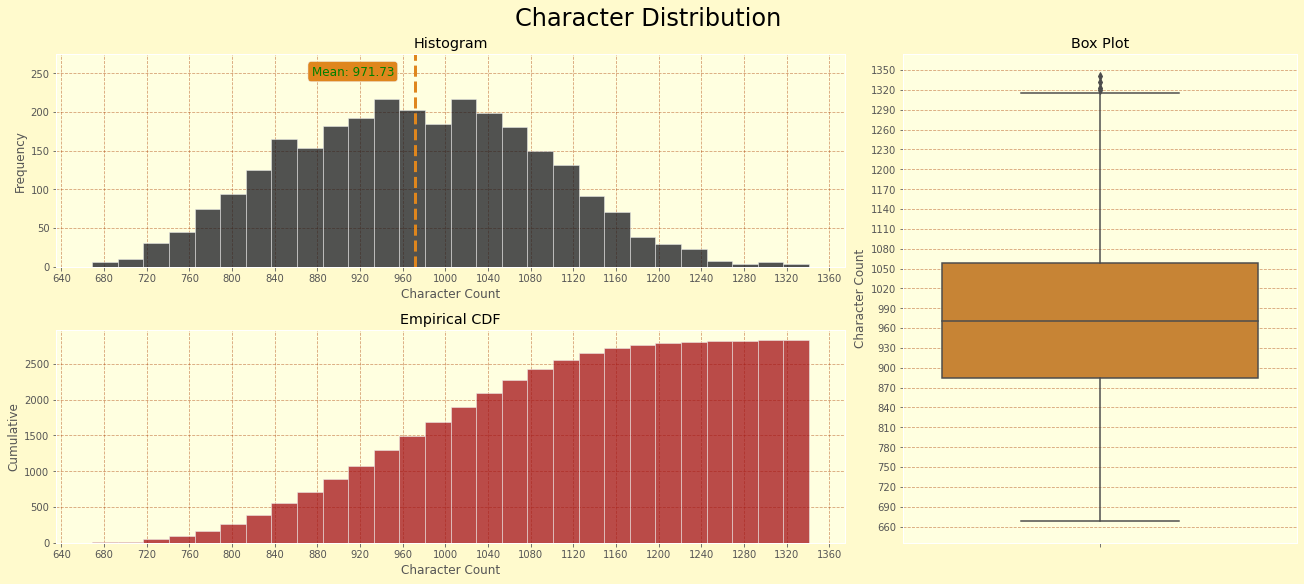

In [11]:
# plotting character distribution
plot_dist4(train_df, 'Character Count',
           'Character Distribution ', orange_black[6])

### When we plot character counts we can see some linear relation there. With increasing number of character counts our target score decreases, interesting...

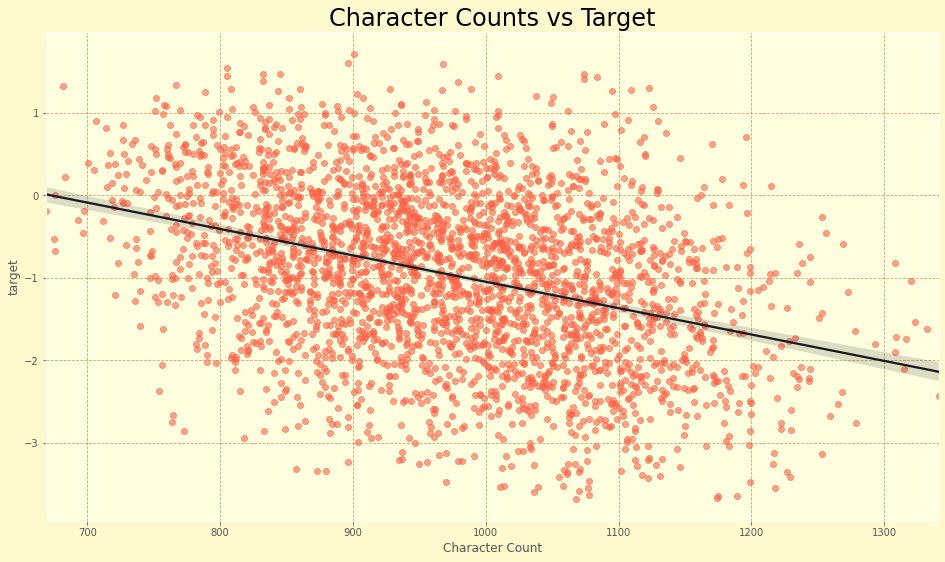

In [12]:
# regplot for character counts

sns.regplot(x=train_df['Character Count'], y=train_df.target, order=1,
                    
                    color=orange_black[2],
                    line_kws={'color': orange_black[6]},
                    scatter_kws={'alpha':0.6})
plt.title('Character Counts vs Target', fontsize=24)

plt.show()

## Word Counts

### Word Counts distribution looks more evenly (not normally!) not sure what it means for now, let's take a closer look with scatterplot...

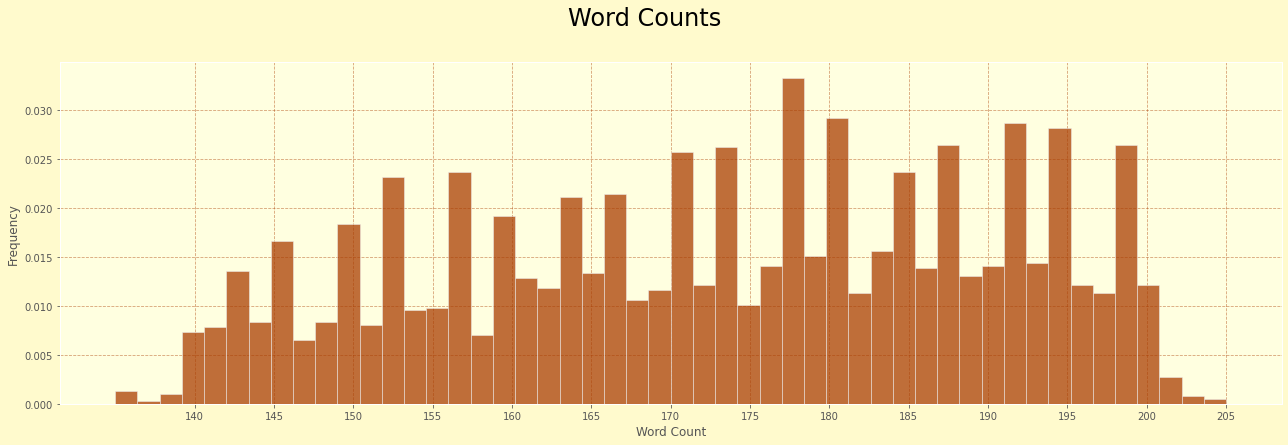

In [13]:
def plot_word_number_histogram(text):
    
    
    """A function for displaying word distribuition"""
    

    fig, axes = plt.subplots(figsize=(18, 6))
    sns.histplot(text.str.split().map(lambda x: len(x)), color=orange_black[3],stat='density', bins=50)
    
    
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')    
    fig.suptitle('Word Counts', fontsize=24, va='baseline')
    plt.xticks(np.arange(140, 210, 5))
    
    # plotting
    
    fig.tight_layout()



plot_word_number_histogram(train_df.excerpt)

# Yeah... Doesn't look much meaningful to me, there's slight decrease in scores when the word count increses. Well let's check other meta features then...

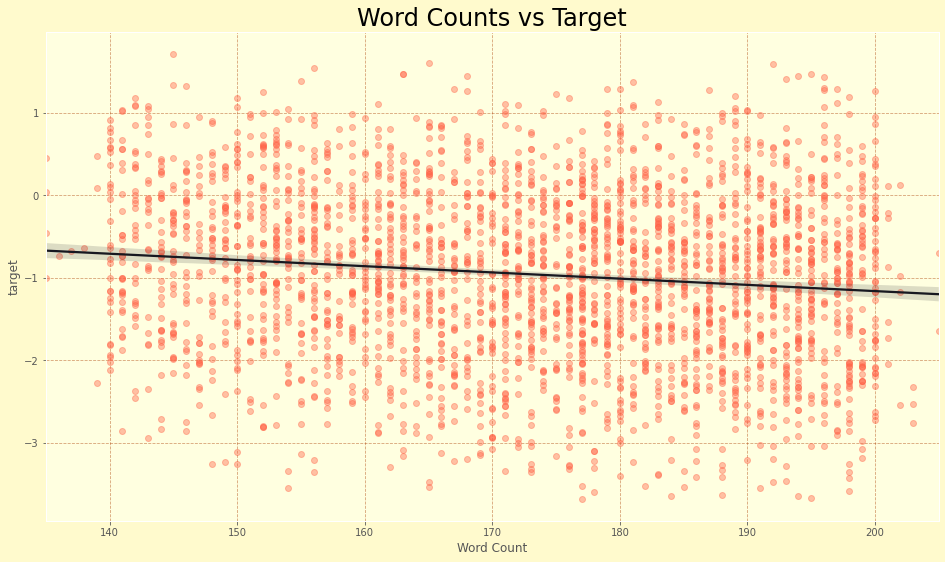

In [14]:
# regplot for word counts

train_df['Word Count']=train_df.excerpt.str.split().map(lambda x: len(x))
sns.regplot(x=train_df['Word Count'], y=train_df.target, order=1,
                    
                    color=orange_black[2],
                    line_kws={'color': orange_black[6]},
                    scatter_kws={'alpha':0.4})
plt.title('Word Counts vs Target', fontsize=24)

# plotting

plt.show()

## Word Lenghts

### Does length of the words affect readability score? Let's check how's the distribution: It looks like decently spread with little bit of right skew...

In [15]:
def plot_word_len_histogram(text):
    
    """A function for comparing average word length"""
    
    fig, axes = plt.subplots(figsize=(18, 6))
    sns.histplot(text.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 color=orange_black[4])   

    
    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    
    # plotting
    
    fig.tight_layout()

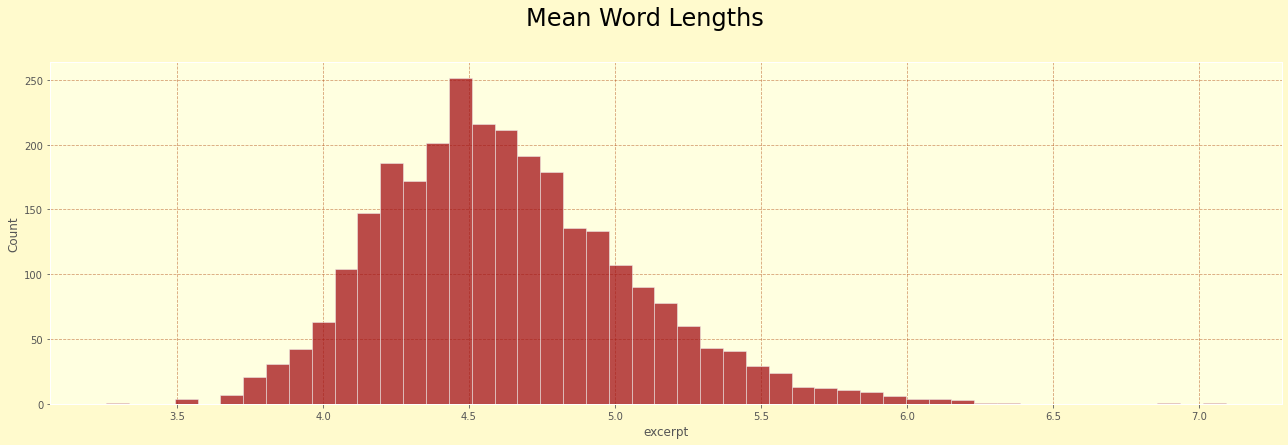

In [16]:
# plotting word len hist

plot_word_len_histogram(train_df.excerpt)

### Oh that's interesting... There's strong linear relation between mean word lenghts and readability. Looks like longer/complicated words decreases the score.

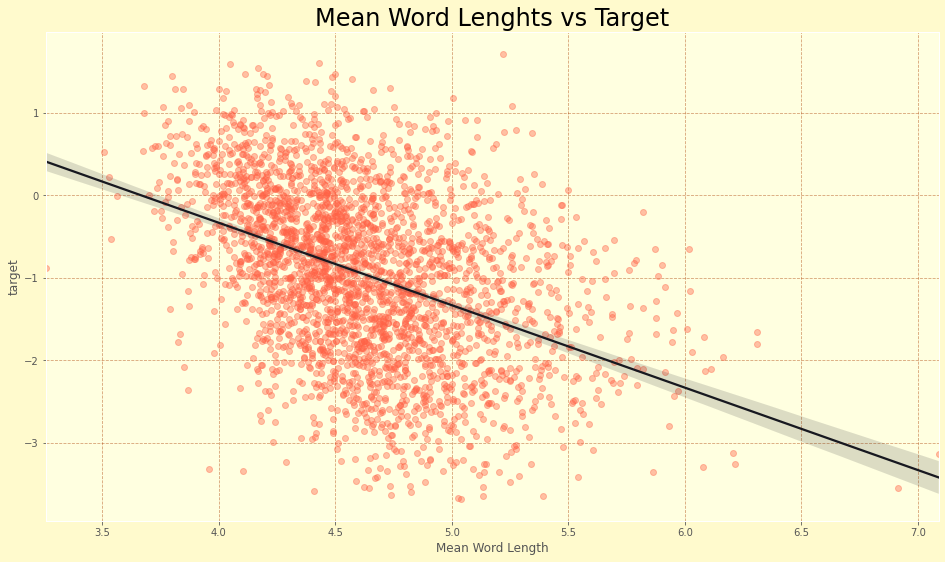

In [17]:
# regplot for word lengths

train_df['Mean Word Length'] = train_df.excerpt.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x))

sns.regplot(x=train_df['Mean Word Length'], y=train_df.target, order=1,
                    
                    color=orange_black[2],
                    line_kws={'color': orange_black[6]},
                    scatter_kws={'alpha':0.4})
plt.title('Mean Word Lenghts vs Target', fontsize=24)

# plotting

plt.show()

## Number of Digits

### We can observe that having lots of digits slightly decreasing readability score...

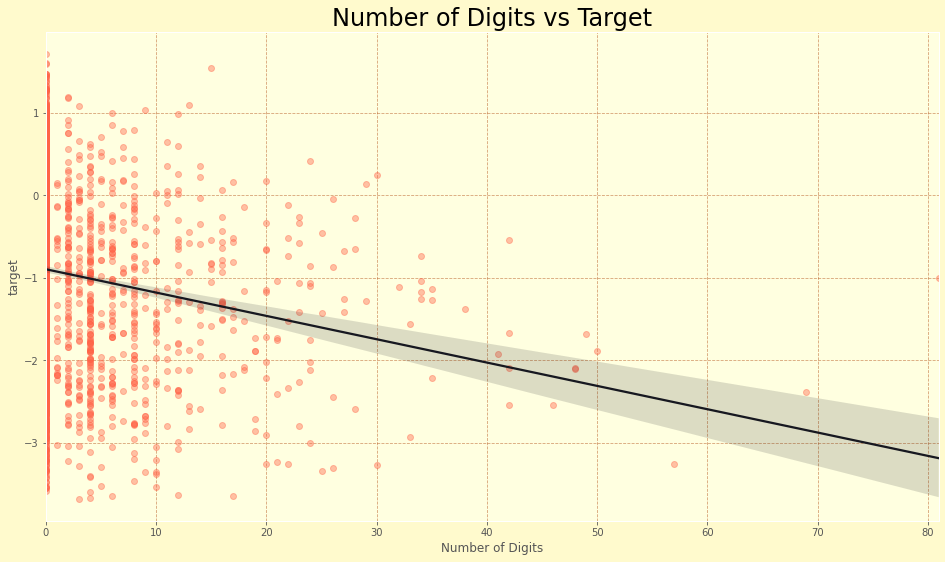

In [18]:
# regplot for word lengths


train_df['Number of Digits'] =  train_df['excerpt'].apply(lambda s: sum(c.isdigit() for c in s))

sns.regplot(x=train_df['Number of Digits'], y=train_df['target'], order=1,
                    color=orange_black[2],
                    line_kws={'color': orange_black[6]},
                    scatter_kws={'alpha':0.4})
plt.title('Number of Digits vs Target', fontsize=24)

# plotting

plt.show()

# Common N-Grams

### Here we check some common words. They're not directly giving us info but they can help us summarizing what kind of texts we have here and understand them.

In [19]:
# creating corpus

from nltk import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords

# setting stopwords 

stopwords = set(stopwords.words('english'))

new = train_df['excerpt'].str.split()
new = new.values.tolist()
corpus = [word.lower() for i in new for word in i if word.lower() not in stopwords]
          
#getting top 20 common words
    
common_words = [i[0] for i in FreqDist(corpus).most_common(20)]
common_words_count = [i[1] for i in FreqDist(corpus).most_common(20)]

## Unigrams

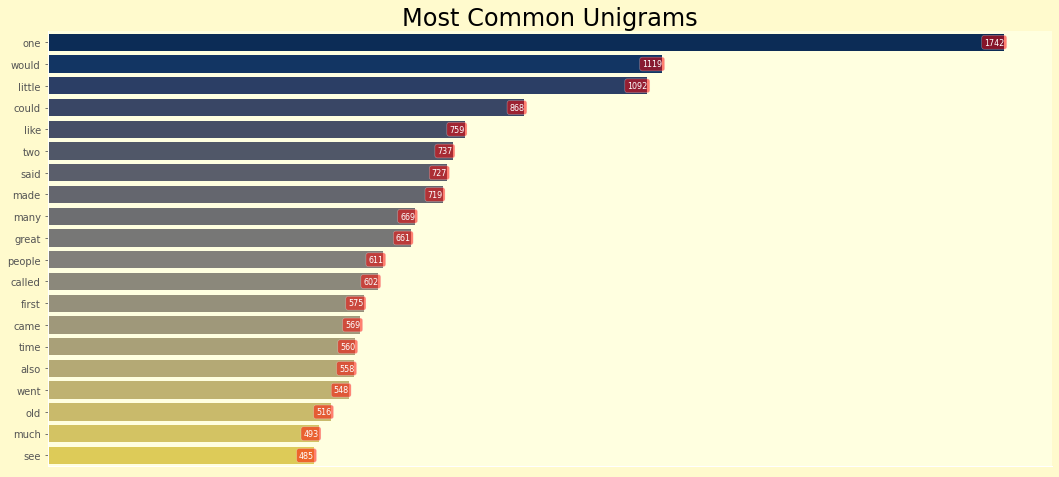

In [20]:
# plotting unigrams

fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x=common_words_count, y=common_words, palette='cividis')
for n, i in enumerate(common_words):    
    ax.text(common_words_count[n]-0.003, 
            n, #Y location
            s=f'{round(common_words_count[n],3)}', 
            va='center', 
            ha='right', 
            color='white', 
            fontsize=8,
            bbox=dict(boxstyle='round',facecolor='red', alpha=0.5))
plt.title('Most Common Unigrams', fontsize=24)
sns.despine()
plt.xticks([])
fig.patch.set_facecolor('#FFFACD')
ax.patch.set_facecolor('#FFFFE0')

plt.show()

## Bigrams

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
def ngrams(n, title, loc):
    """A Function to plot most common ngrams"""
    fig, ax = plt.subplots(figsize=(18, 8))

    new = train_df.excerpt.str.split()
    new = new.values.tolist()
    corpus = [word.lower() for i in new for word in i if word.lower()]

    def _get_top_ngram(corpus, n=None):
        #getting top ngrams
        vec = CountVectorizer(ngram_range=(n, n),
                              max_df=0.9,
                              stop_words='english').fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:15]

    top_n_bigrams = _get_top_ngram(train_df.excerpt, n)[:15]
    x, y = map(list, zip(*top_n_bigrams))
    sns.barplot(x=y, y=x, palette='cividis')  
    
    
    for n, i in enumerate(x):    
            ax.text(y[n]-loc, 
            n, #Y location
            s=f'{round(y[n],3)}', 
            va='center', 
            ha='right', 
            color='white', 
            fontsize=8,
            bbox=dict(boxstyle='round',facecolor='red', alpha=0.5))

    fig.suptitle(title, fontsize=24, va='baseline')
    sns.despine()
    plt.xticks([])
    fig.patch.set_facecolor('#FFFACD')
    ax.patch.set_facecolor('#FFFFE0')
    plt.show()

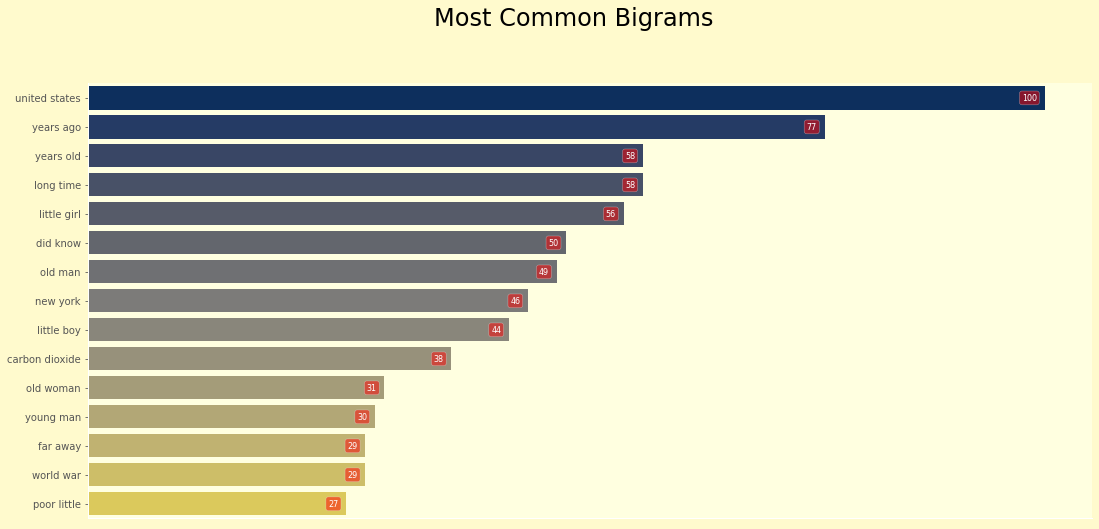

In [22]:
# plotting bigrams
ngrams(2, 'Most Common Bigrams', 0.8)

## Trigrams

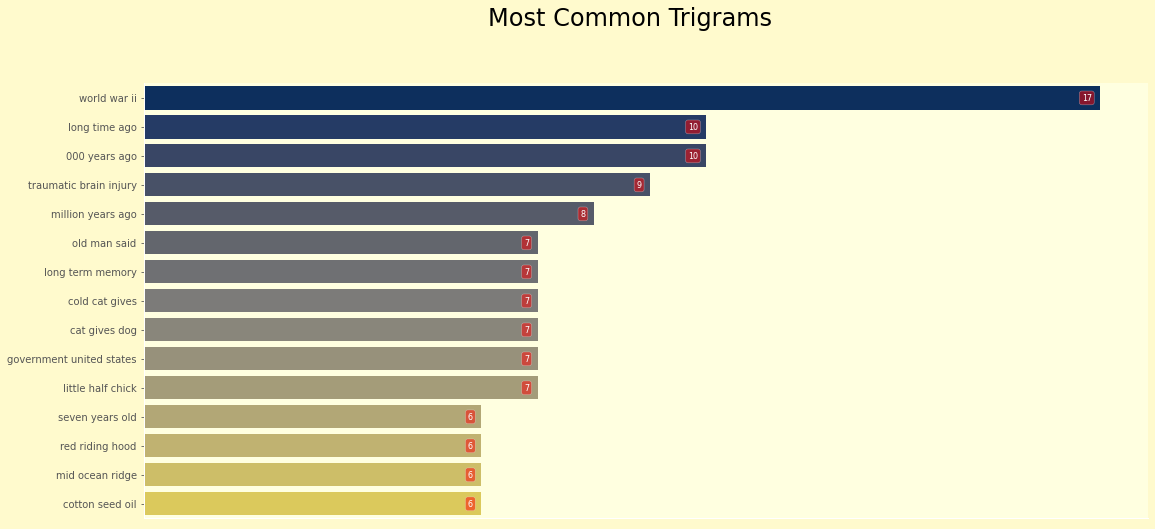

In [23]:
# plotting trigrams
ngrams(3, 'Most Common Trigrams', 0.15)

# Wordcloud

## Again most common words in more visual format, not giving us extra feature but looks cool right? :)

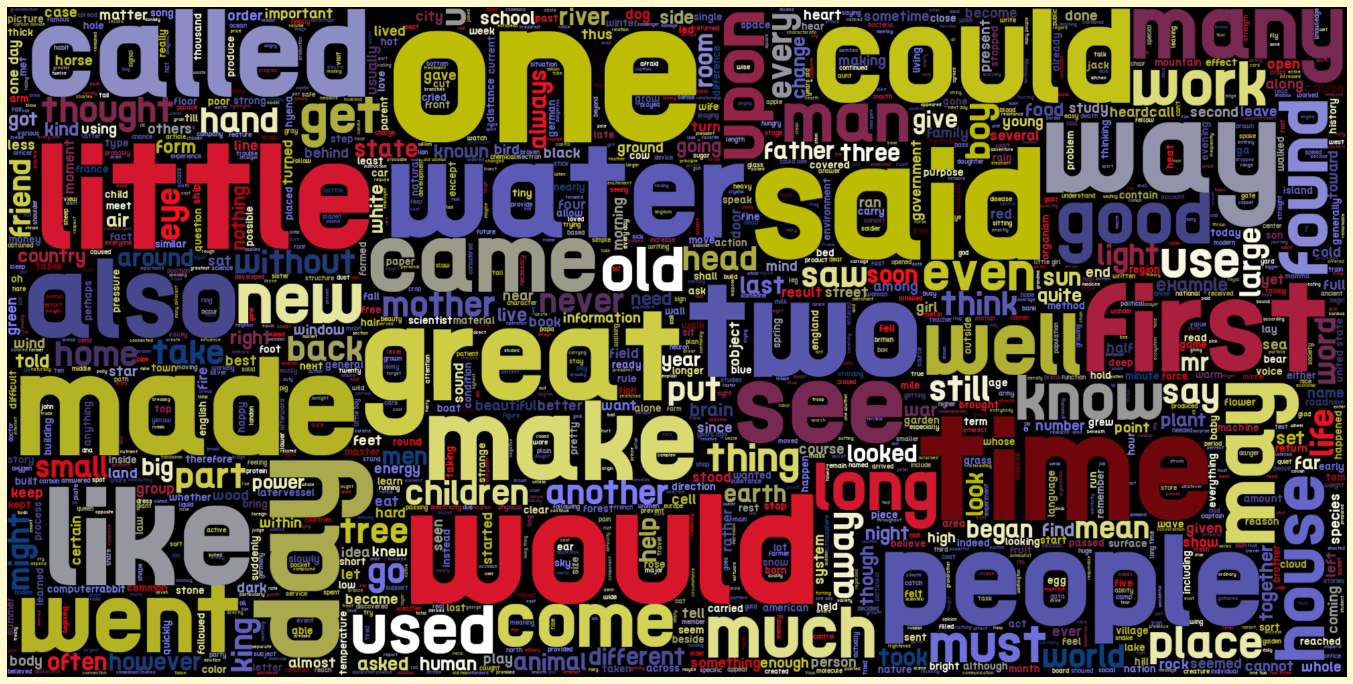

In [24]:
# make worldcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# getting tokens
texts = " ".join(token for token in corpus)
# setting stopwords
stopwords_wc = set(stopwords)
# loading custom font
font_path = "../input/wcloud/acetone_font.otf"

# generating wordcloud
wordcloud = WordCloud(stopwords=stopwords_wc, font_path=font_path,
                      max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "gist_stern")
wordcloud.generate(texts)

# plotting
plt.figure(figsize = (24, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Getting Sentence Embeddings

### We're given small number of training instances. With huge models especially neural networks we're always in risk of overfitting. For this and baseline purposes I implemented a simple sentence embedding model based on fine tuned roberta. After getting embedding matrix we are going to train that using Bayesian Ridge Regression...

In [25]:
# loading model using sentence transformers

import sentence_transformers
from sentence_transformers import SentenceTransformer, models

# setting model path for fine-tuned roberta weights

model_path = '../input/finetuned-model1/checkpoint-568'
word_embedding_model = models.Transformer(model_path, max_seq_length=275)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])


Some weights of RobertaModel were not initialized from the model checkpoint at ../input/finetuned-model1/checkpoint-568 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Vectorizing Texts

### First we're going to vectorize our sentences to get numerical representations so we can feed them into our traditional machine learning algorithms...

In [26]:
# encoding train and test strings

X_train = model.encode(train_df.excerpt, device='cuda')
X_test = model.encode(test_df.excerpt, device='cuda')

Batches:   0%|          | 0/89 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
# checking shapes of embeddings

display(X_train.shape)
display(X_test.shape)

(2834, 1024)

(7, 1024)

# Cross Validation

### As I said we used really simple regressor to get results, I haven't used our extra features, neither optimized the model parameters. I think it's possible to get better score by using more advanced models with optimized parameters but for now we'll leave it like that. But for Bayesian Ridge we got decent starting point! I stratified the folds across the character counts which I believe  it gives more balanced stratification...

In [28]:
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge

preds = []
train_scores = []

df_oof=train_df.copy()
df_oof['oof'] = 0

skf = StratifiedKFold(10, shuffle=True, random_state=42)

splits = list(skf.split(X=X_train, y=train_df['Character Count']))

# predicting out of fold scores for each fold and doing predictions for each training set

for i, (train_idx, val_idx) in enumerate(splits):
    print(f'\n------------- Training Fold {i + 1} / {10}')
    print("Current Time =", datetime.now().strftime("%H:%M:%S"))

    clf = BayesianRidge(n_iter=300, verbose=True)
    clf.fit(X_train[train_idx],train_df.target[train_idx])
    train_score=mean_squared_error(train_df.target[train_idx], clf.predict(X_train[train_idx]), squared=False)
    train_scores.append(train_score)
    print(f"Fold {i} train RMSE: {train_score}")
    
    
    preds.append(clf.predict(X_test))
    x=clf.predict(X_train[val_idx])
    df_oof['oof'].iloc[val_idx]+= x

print(f'Training score: {np.mean(train_scores)}, Training STD: {np.std(train_scores)}')
print(f'OOF score across folds: {mean_squared_error(df_oof.target, df_oof.oof, squared=False)}')


------------- Training Fold 1 / 10
Current Time = 03:25:04
Convergence after  25  iterations
Fold 0 train RMSE: 0.3495152662324014

------------- Training Fold 2 / 10
Current Time = 03:25:05
Convergence after  26  iterations
Fold 1 train RMSE: 0.3464716560377945

------------- Training Fold 3 / 10
Current Time = 03:25:07
Convergence after  24  iterations
Fold 2 train RMSE: 0.34548909152754764

------------- Training Fold 4 / 10
Current Time = 03:25:08
Convergence after  27  iterations
Fold 3 train RMSE: 0.34380351587150365

------------- Training Fold 5 / 10
Current Time = 03:25:10
Convergence after  25  iterations
Fold 4 train RMSE: 0.3447657777000061

------------- Training Fold 6 / 10
Current Time = 03:25:12
Convergence after  25  iterations
Fold 5 train RMSE: 0.34877749174196704

------------- Training Fold 7 / 10
Current Time = 03:25:14
Convergence after  25  iterations
Fold 6 train RMSE: 0.34875123378514916

------------- Training Fold 8 / 10
Current Time = 03:25:15
Convergence 

# Results

### Not a bad score for such a simple approach! More importantly I got decent CV/LB correlation. It's still early parts of the competition and I believe we gonna get more complicated models on the course but I thik this is decent starting point for starters. I hope you find it useful, **if you do please dont forget to upvote!** Also feel free to ask if you have any questions in comments section.

### Happy coding!

# Submission

In [29]:
# getting mean prediction across 5 folds
y_pred = np.mean(preds,0)
y_pred.shape

(7,)

In [30]:
# creating submission csv

sub = test_df[["id"]].copy()
sub["target"] = y_pred
sub.to_csv('submission.csv', index = False)

In [31]:
# checking submission file

sub.head()

,id,target
0,c0f722661,-0.481129
1,f0953f0a5,-0.336712
2,0df072751,-0.361644
3,04caf4e0c,-2.282381
4,0e63f8bea,-1.842639
